<a href="https://colab.research.google.com/github/omareldalil4/XAI_Task/blob/main/XAI_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid')


# **Load Iris Dataset**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, names=columns)

df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

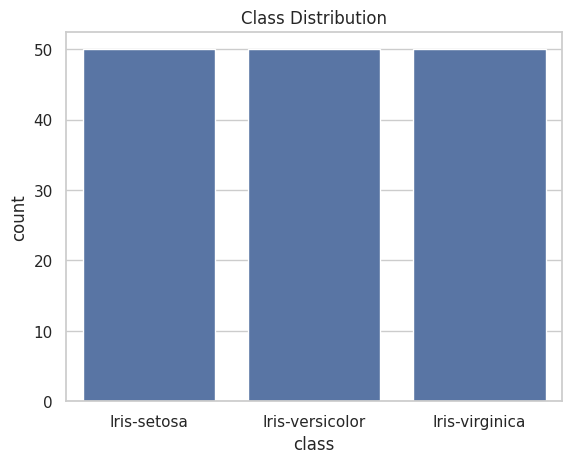

In [ ]:
print(df.info())
print(df.describe())

sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

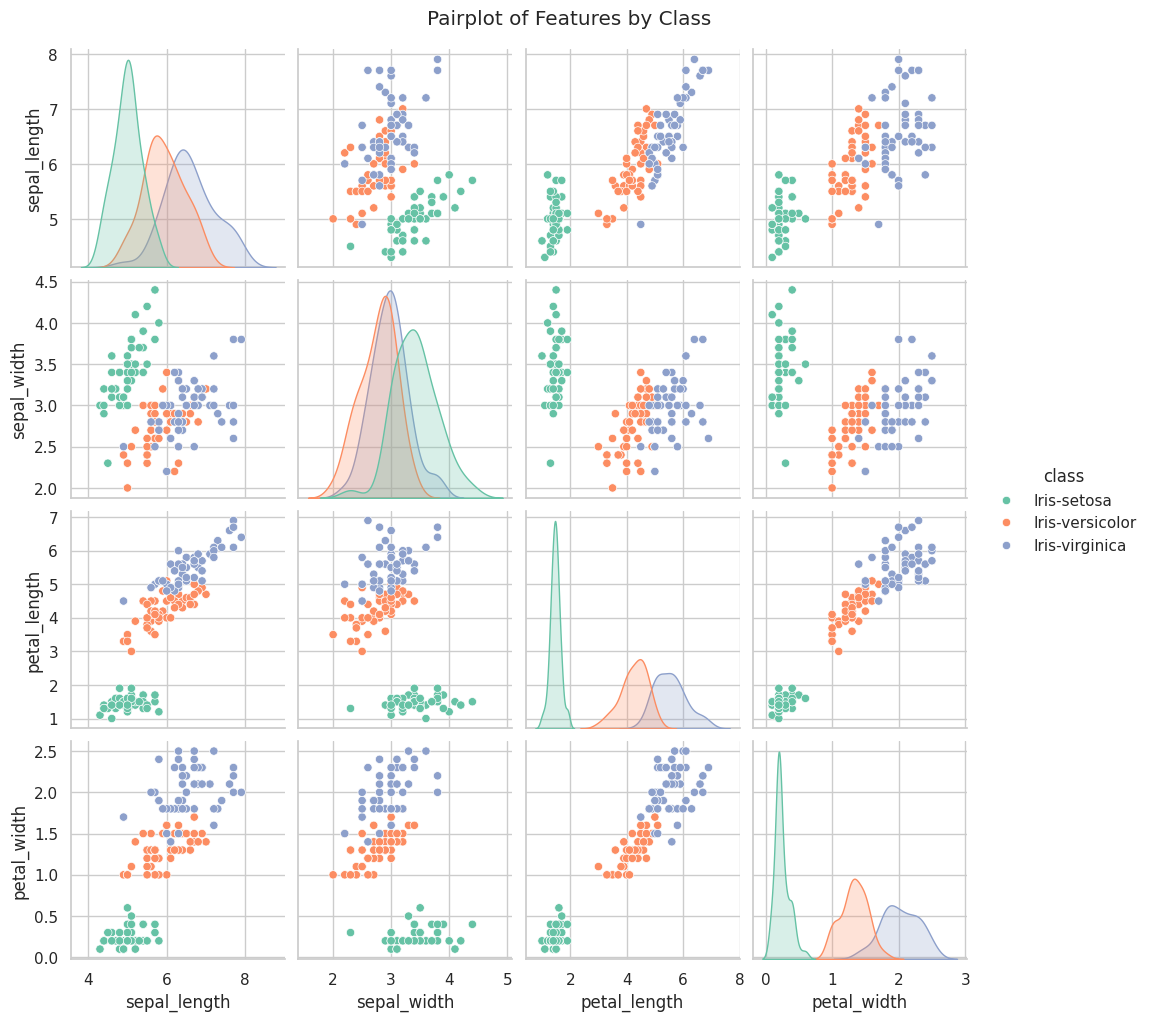

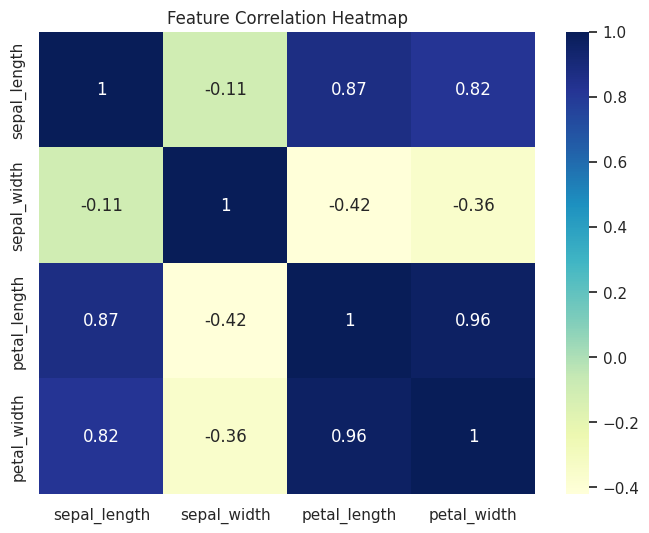

In [ ]:
sns.pairplot(df, hue='class', palette='Set2')
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Training(Random Forest)**

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



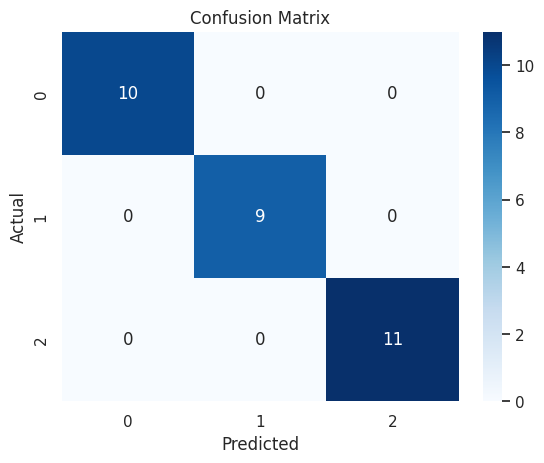

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **XAI**

# ***LIME ***

In [ ]:
!pip install lime

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=le.classes_,
    mode='classification'
)

i = 0
sample = X_test.iloc[i]

print("Sample values:")
print(sample)

exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_all=False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b73d6f36fe9bd2ce231d4a0226c3d4301b76efbe539ce747a0d019a55bbf4670
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Sample values:
sepal_length    6.1
sepal_width     2.8
petal_length    4.7
petal_width     1.2
Name: 73, dtype: float64


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

# **SHAP**

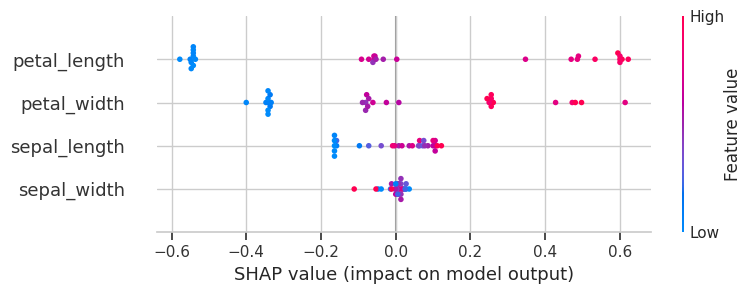

In [ ]:
import shap
shap.initjs()

explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)


shap.summary_plot(shap_values.values, X_test, feature_names=X.columns)


# **Partial Dependence Plot**

In [ ]:
from sklearn.inspection import PartialDependenceDisplay


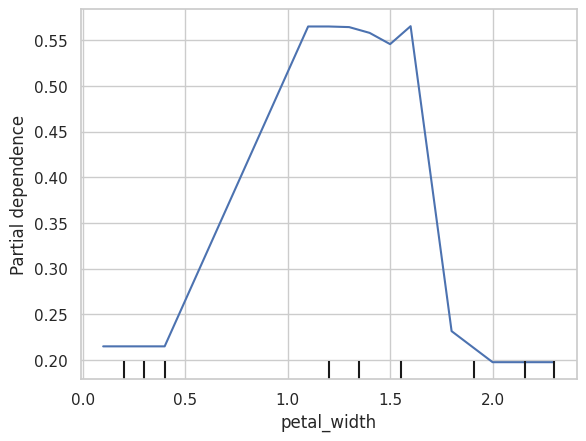

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = ['petal_width']

PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    features=features,
    feature_names=X.columns,
    target=1,
    grid_resolution=100,
)

plt.show()


# **2D PDP**

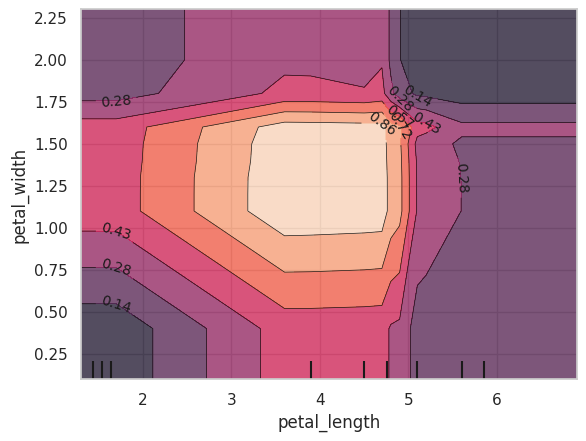

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = [('petal_length', 'petal_width')]

PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    features=features,
    feature_names=X.columns,
    target=1,
    grid_resolution=100,
)

plt.show()
